In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("traindata.csv")
train.head()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,7,20,Friday,7.192192e+09,1,FROZEN FOODS,9117.0
1,7,20,Friday,6.811311e+10,2,SERVICE DELI,4010.0
2,25,28,Friday,8.805520e+11,1,LADIESWEAR,313.0
3,25,28,Friday,8.085947e+10,1,LADIESWEAR,4447.0
4,25,28,Friday,4.900004e+09,1,DSD GROCERY,9538.0


In [3]:
test = pd.read_csv("testdata.csv")
test.head()

,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,87,Friday,7.106841e+09,1,FROZEN FOODS,4063
1,361,Friday,6.727878e+10,1,MENS WEAR,1605
2,385,Friday,2.840007e+09,1,DSD GROCERY,4551
3,413,Friday,2.200000e+09,1,IMPULSE MERCHANDISE,135
4,462,Friday,7.282133e+10,1,PLUS AND MATERNITY,744


In [5]:
train.head(10)

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,7,20,Friday,7.192192e+09,1,FROZEN FOODS,9117.0
1,7,20,Friday,6.811311e+10,2,SERVICE DELI,4010.0
2,25,28,Friday,8.805520e+11,1,LADIESWEAR,313.0
3,25,28,Friday,8.085947e+10,1,LADIESWEAR,4447.0
4,25,28,Friday,4.900004e+09,1,DSD GROCERY,9538.0
5,25,28,Friday,9.933894e+09,1,LADIESWEAR,1180.0
6,25,28,Friday,2.430004e+09,1,COMM BREAD,3709.0
7,25,28,Friday,7.874299e+09,1,BAKERY,2010.0
8,25,28,Friday,7.874299e+09,1,BAKERY,2010.0
9,25,28,Friday,4.900001e+09,1,DSD GROCERY,9538.0


In [6]:
train.shape

(77186, 7)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77186 entries, 0 to 77185
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   TripType               77186 non-null  int64  
 1   VisitNumber            77186 non-null  int64  
 2   Weekday                77186 non-null  object 
 3   Upc                    77186 non-null  float64
 4   ScanCount              77186 non-null  int64  
 5   DepartmentDescription  77186 non-null  object 
 6   FinelineNumber         77186 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 4.1+ MB


In [8]:
train.isnull().sum()

TripType                 0
VisitNumber              0
Weekday                  0
Upc                      0
ScanCount                0
DepartmentDescription    0
FinelineNumber           0
dtype: int64

In [9]:
# form hypothesis on the data - what behaviour exists in different trip types

In [10]:
# weekends - a particular trip type will be dominating

In [13]:
train['TripType'].unique()

array([ 7, 25, 38])

In [14]:
train['TripType'].value_counts()

38    28525
25    26493
7     22168
Name: TripType, dtype: int64

In [15]:
# trip 38 is most frequently occuring one

Text(0, 0.5, 'Count')

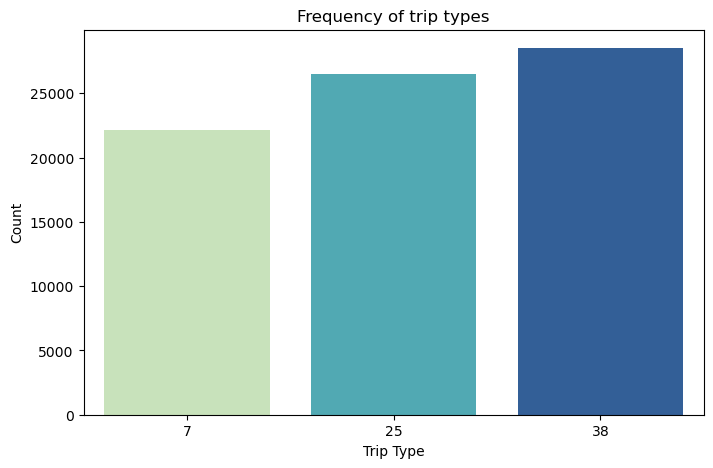

In [17]:
plt.figure(figsize =(8,5))
sns.countplot(data = train, x = 'TripType',palette = 'YlGnBu')
plt.title("Frequency of trip types")
plt.xlabel("Trip Type")
plt.ylabel("Count")

In [18]:
# quantity

In [19]:
train['ScanCount'].value_counts()

 1     68284
 2      6260
 3      1016
-1       700
 4       535
 5       162
 6        90
-2        39
 8        30
 7        23
 10       13
-3         7
 12        7
 9         6
 11        5
 15        2
 30        1
 46        1
 24        1
 18        1
-4         1
 14        1
 13        1
Name: ScanCount, dtype: int64

In [23]:
c = train.groupby(["VisitNumber","TripType"])['ScanCount'].sum().sort_values(ascending = False).reset_index()
c

,VisitNumber,TripType,ScanCount
0,84350,38,89
1,127057,38,81
2,71143,38,74
3,188905,38,68
4,27356,38,66
...,...,...,...
12304,140036,38,0
12305,116544,7,0
12306,136530,38,-1
12307,75132,7,-1


In [24]:
# average qtys bought in each trip type

In [29]:
c_r = c.groupby("TripType")['ScanCount'].mean().reset_index()
c_r

,TripType,ScanCount
0,7,4.536585
1,25,7.584911
2,38,11.516140


Text(0, 0.5, 'Average Quanity')

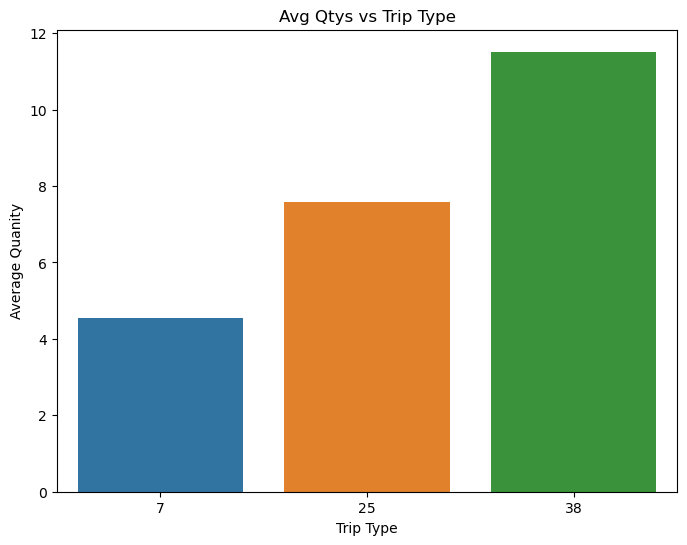

In [30]:
plt.figure(figsize =(8,6))
sns.barplot(x = 'TripType', y = 'ScanCount', data = c_r)
plt.title("Avg Qtys vs Trip Type")
plt.xlabel("Trip Type")
plt.ylabel("Average Quanity")

In [32]:
# Trip type 38 has bulk shoppers - more basket size

In [33]:
# hypothesis - Trip type is dependent on weekdays

In [36]:
w = train.groupby(['TripType','Weekday']).size().reset_index(name = 'count')
w

,TripType,Weekday,count
0,7,Friday,3078
1,7,Monday,3127
2,7,Saturday,3451
3,7,Sunday,3840
4,7,Thursday,2739
5,7,Tuesday,2825
6,7,Wednesday,3108
7,25,Friday,4231
8,25,Monday,2811
9,25,Saturday,5369


In [39]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

w['Weekday'] = pd.Categorical(w['Weekday'], categories=weekday_order, ordered=True)

Text(0, 0.5, 'Count')

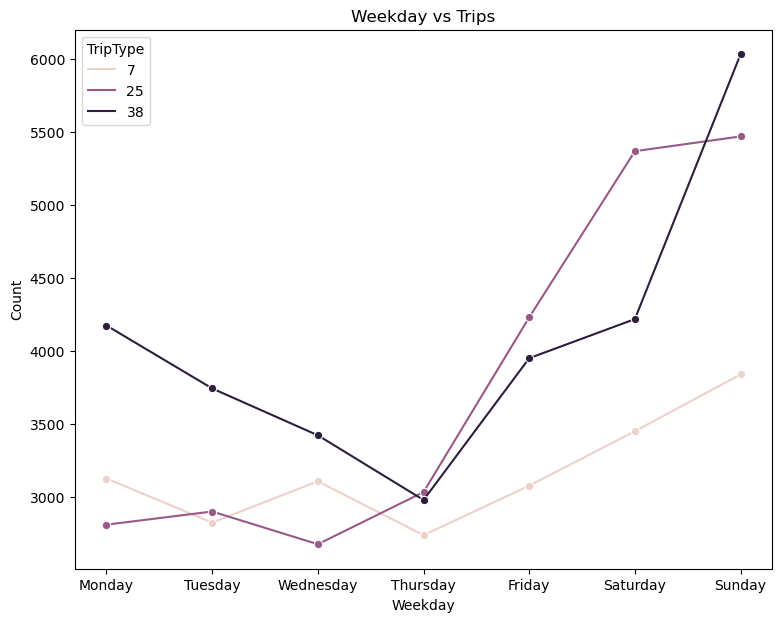

In [42]:
plt.figure(figsize = (9,7))
sns.lineplot(data = w, x = 'Weekday', y= 'count', hue = 'TripType', marker = 'o')
plt.title("Weekday vs Trips")
plt.xlabel("Weekday")
plt.ylabel("Count")

In [43]:
# sundays have the most visits
# Trip type 38 tends to buy more than others on Mondays
# Trip type 25 and 38 perform similarly on Thursdays
# On Saturdays, when every trip type tends to buy morem trip type 38 visits the store less

In [44]:
# department

In [46]:
d = train.groupby(['TripType','DepartmentDescription']).size().reset_index(name = "count")
d

,TripType,DepartmentDescription,count
0,7,1-HR PHOTO,3
1,7,ACCESSORIES,11
2,7,AUTOMOTIVE,30
3,7,BAKERY,856
4,7,BATH AND SHOWER,5
...,...,...,...
178,38,SHOES,41
179,38,SLEEPWEAR/FOUNDATIONS,24
180,38,SPORTING GOODS,24
181,38,TOYS,56


In [47]:
top_departments = d.groupby('TripType').apply(lambda x: x.nlargest(3, 'count')).reset_index(drop=True)

In [48]:
top_departments

,TripType,DepartmentDescription,count
0,7,SERVICE DELI,3522
1,7,GROCERY DRY GOODS,3201
2,7,PRODUCE,2879
3,25,MENS WEAR,5196
4,25,LADIESWEAR,3591
5,25,"GIRLS WEAR, 4-6X AND 7-14",1755
6,38,DAIRY,6974
7,38,GROCERY DRY GOODS,6243
8,38,DSD GROCERY,3875


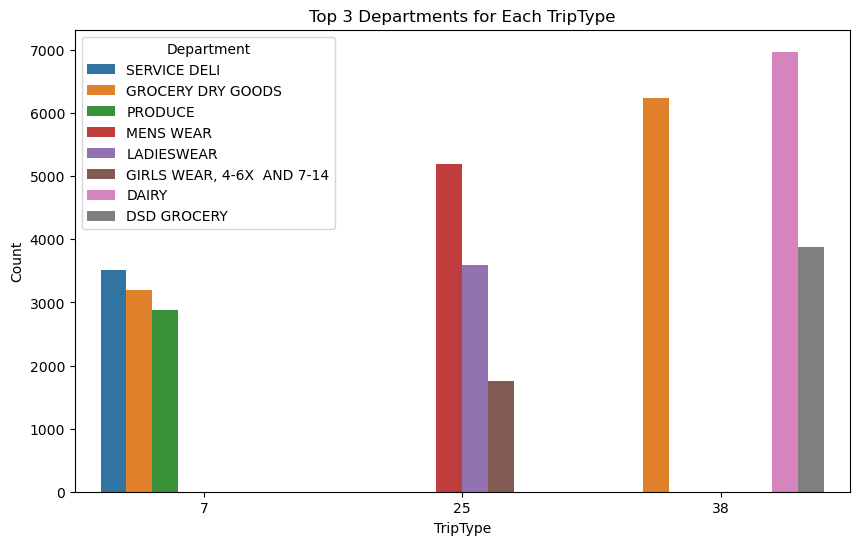

In [50]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_departments, x='TripType', y='count', hue='DepartmentDescription')
plt.title("Top 3 Departments for Each TripType")
plt.xlabel("TripType")
plt.ylabel("Count")
plt.legend(title='Department')
plt.show()

In [51]:
# trip type 38 tend to buy daily items more
# trip type 25 tend to buy garments more, trip type 7 buys service products more

In [52]:
# classification

In [53]:
train.head()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,7,20,Friday,7.192192e+09,1,FROZEN FOODS,9117.0
1,7,20,Friday,6.811311e+10,2,SERVICE DELI,4010.0
2,25,28,Friday,8.805520e+11,1,LADIESWEAR,313.0
3,25,28,Friday,8.085947e+10,1,LADIESWEAR,4447.0
4,25,28,Friday,4.900004e+09,1,DSD GROCERY,9538.0


In [54]:
test.head()

,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,87,Friday,7.106841e+09,1,FROZEN FOODS,4063
1,361,Friday,6.727878e+10,1,MENS WEAR,1605
2,385,Friday,2.840007e+09,1,DSD GROCERY,4551
3,413,Friday,2.200000e+09,1,IMPULSE MERCHANDISE,135
4,462,Friday,7.282133e+10,1,PLUS AND MATERNITY,744


In [55]:
t = train.drop(['VisitNumber','Upc','FinelineNumber'],axis = 1)
t

,TripType,Weekday,ScanCount,DepartmentDescription
0,7,Friday,1,FROZEN FOODS
1,7,Friday,2,SERVICE DELI
2,25,Friday,1,LADIESWEAR
3,25,Friday,1,LADIESWEAR
4,25,Friday,1,DSD GROCERY
...,...,...,...,...
77181,25,Sunday,2,MENS WEAR
77182,25,Sunday,2,DSD GROCERY
77183,25,Sunday,1,IMPULSE MERCHANDISE
77184,25,Sunday,1,MENS WEAR


In [56]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

t['Weekday_encoded'] = label_encoder.fit_transform(t['Weekday'])
t['Dept_encoded'] = label_encoder.fit_transform(t['DepartmentDescription'])

In [57]:
t.head(10)

,TripType,Weekday,ScanCount,DepartmentDescription,Weekday_encoded,Dept_encoded
0,7,Friday,1,FROZEN FOODS,0,20
1,7,Friday,2,SERVICE DELI,0,56
2,25,Friday,1,LADIESWEAR,0,35
3,25,Friday,1,LADIESWEAR,0,35
4,25,Friday,1,DSD GROCERY,0,16
5,25,Friday,1,LADIESWEAR,0,35
6,25,Friday,1,COMM BREAD,0,13
7,25,Friday,1,BAKERY,0,3
8,25,Friday,1,BAKERY,0,3
9,25,Friday,1,DSD GROCERY,0,16


In [58]:
X = t.drop(['TripType','Weekday','DepartmentDescription'],axis = 1)
y = t['TripType']

In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [60]:
X

,ScanCount,Weekday_encoded,Dept_encoded
0,1,0,20
1,2,0,56
2,1,0,35
3,1,0,35
4,1,0,16
...,...,...,...
77181,2,3,40
77182,2,3,16
77183,1,3,30
77184,1,3,40


In [61]:
y

0         7
1         7
2        25
3        25
4        25
         ..
77181    25
77182    25
77183    25
77184    25
77185    25
Name: TripType, Length: 77186, dtype: int64

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
model = RandomForestClassifier(n_estimators = 100, random_state = 42)
model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [64]:
# evaluate the model

In [65]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(x_test)
acc = accuracy_score(y_test,y_pred)
acc

0.696268946754761

In [66]:
test

,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,87,Friday,7.106841e+09,1,FROZEN FOODS,4063
1,361,Friday,6.727878e+10,1,MENS WEAR,1605
2,385,Friday,2.840007e+09,1,DSD GROCERY,4551
3,413,Friday,2.200000e+09,1,IMPULSE MERCHANDISE,135
4,462,Friday,7.282133e+10,1,PLUS AND MATERNITY,744
...,...,...,...,...,...,...
2995,191158,Sunday,5.010046e+09,5,FROZEN FOODS,4138
2996,191164,Sunday,7.874235e+09,1,DAIRY,1508
2997,191225,Sunday,7.047049e+09,1,DAIRY,1344
2998,191256,Sunday,4.393559e+09,1,MENS WEAR,5542


In [69]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Label encode Weekday and DepartmentDescription
test['Weekday_Encoded'] = label_encoder.fit_transform(test['Weekday'])
test['Dept_encoded'] = label_encoder.fit_transform(test['DepartmentDescription'])

test

,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber,Weekday_Encoded,DepartmentDescription_Encoded,Dept_encoded
0,87,Friday,7.106841e+09,1,FROZEN FOODS,4063,0,18,18
1,361,Friday,6.727878e+10,1,MENS WEAR,1605,0,37,37
2,385,Friday,2.840007e+09,1,DSD GROCERY,4551,0,14,14
3,413,Friday,2.200000e+09,1,IMPULSE MERCHANDISE,135,0,27,27
4,462,Friday,7.282133e+10,1,PLUS AND MATERNITY,744,0,45,45
...,...,...,...,...,...,...,...,...,...
2995,191158,Sunday,5.010046e+09,5,FROZEN FOODS,4138,3,18,18
2996,191164,Sunday,7.874235e+09,1,DAIRY,1508,3,13,13
2997,191225,Sunday,7.047049e+09,1,DAIRY,1344,3,13,13
2998,191256,Sunday,4.393559e+09,1,MENS WEAR,5542,3,37,37


In [70]:
te = test.drop(['VisitNumber','Weekday','Upc','DepartmentDescription','DepartmentDescription_Encoded','FinelineNumber'],axis = 1)
te

,ScanCount,Weekday_Encoded,Dept_encoded
0,1,0,18
1,1,0,37
2,1,0,14
3,1,0,27
4,1,0,45
...,...,...,...
2995,5,3,18
2996,1,3,13
2997,1,3,13
2998,1,3,37


In [71]:
test_pred = model.predict(te)
test_pred

/Users/megnaroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Weekday_Encoded
Feature names seen at fit time, yet now missing:
- Weekday_encoded

  warnings.warn(message, FutureWarning)


array([25, 25, 25, ..., 38, 25, 25])

In [72]:
sub = pd.DataFrame({'VisitNumber':test['VisitNumber'],'TripType':test_pred})
sub

,VisitNumber,TripType
0,87,25
1,361,25
2,385,25
3,413,25
4,462,25
...,...,...
2995,191158,38
2996,191164,38
2997,191225,38
2998,191256,25
